# Combine mice and human data

# Mice data

Import necessary lib

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#%matplotlib notebook
%matplotlib inline
from scipy.signal import butter, lfilter

Read two TBI and two Control Mouse data

In [2]:
sham1=pd.read_csv('Sham102_BL5.csv', header=None, index_col=None)#load data
sham2=pd.read_csv('Sham103_BL5.csv', header=None, index_col=None)#load data

tbi1=pd.read_csv('TBI104_BL5.csv', header=None, index_col=None)#load data
tbi2=pd.read_csv('TBI106_BL5.csv', header=None, index_col=None)#load data

sham1.columns=['Timestamp_Index','Wake','NREM','REM','EEG','EMG','Mouse_Label']
sham2.columns=['Timestamp_Index','Wake','NREM','REM','EEG','EMG','Mouse_Label']

tbi1.columns=['Timestamp_Index','Wake','NREM','REM','EEG','EMG','Mouse_Label']
tbi2.columns=['Timestamp_Index','Wake','NREM','REM','EEG','EMG','Mouse_Label']

Initialize common variable

In [3]:
hours = 24 #initialize common variables
epoch = 4
num_epoch = int(hours * 60 * 60 / epoch)

Extract 1min wake data

In [4]:
#extract 1min wake data from Control mouse
start1=[]
stop1=[]
check1=[]
sham_extract1=list()
j1=0
l1=0
for i in range((24*60*60*256)-60):
    if i == 0:
        if sham1.iloc[:,1][i]==1:
            if sum(sham1.iloc[:,1][i:i+(60*256)])==256*60:
                chunk1=sham1.iloc[:,4][i:i+(60*256)]
                sham_extract1.append(chunk1)

                j1=i
                start1.append(j1)
                k1=i+(60*256)-1
                stop1.append(k1)
                l1=l1+1
    else:
        if i > stop1[l1-1]:
            if sham1.iloc[:,1][i]==1:
                if sum(sham1.iloc[:,1][i:i+(60*256)])==256*60:
                    chunk1=sham1.iloc[:,4][i:i+(60*256)]
                    sham_extract1.append(chunk1)

                    j1=i
                    start1.append(j1)
                    k1=i+(60*256)-1
                    stop1.append(k1)
                    l1=l1+1

In [5]:
#extract 1min wake data from Control mouse
start2=[]
stop2=[]
check2=[]
sham_extract2=list()
j2=0
l2=0
for i in range((24*60*60*256)-60):
    if i == 0:
        if sham2.iloc[:,1][i]==1:
            if sum(sham2.iloc[:,1][i:i+(60*256)])==256*60:
                chunk2=sham2.iloc[:,4][i:i+(60*256)]
                sham_extract2.append(chunk2)

                j2=i
                start2.append(j2)
                k2=i+(60*256)-1
                stop2.append(k2)
                l2=l2+1
    else:
        if i > stop2[l2-1]:
            if sham2.iloc[:,1][i]==1:
                if sum(sham2.iloc[:,1][i:i+(60*256)])==256*60:
                    chunk2=sham2.iloc[:,4][i:i+(60*256)]
                    sham_extract2.append(chunk2)

                    j2=i
                    start2.append(j2)
                    k2=i+(60*256)-1
                    stop2.append(k2)
                    l2=l2+1

In [6]:
#extract 1min wake data from TBI mouse
start3=[]
stop3=[]
check3=[]
tbi_extract1=list()
j3=0
l3=0
for i in range((24*60*60*256)-60):
    if i == 0:
        if tbi1.iloc[:,1][i]==1:
            if sum(tbi1.iloc[:,1][i:i+(60*256)])==256*60:
                chunk3=tbi1.iloc[:,4][i:i+(60*256)]
                tbi_extract1.append(chunk3)

                j3=i
                start3.append(j3)
                k3=i+(60*256)-1
                stop3.append(k3)
                l3=l3+1
    else:
        if i > stop3[l3-1]:
            if tbi1.iloc[:,1][i]==1:
                if sum(tbi1.iloc[:,1][i:i+(60*256)])==256*60:
                    chunk3=tbi1.iloc[:,4][i:i+(60*256)]
                    tbi_extract1.append(chunk3)

                    j3=i
                    start3.append(j3)
                    k3=i+(60*256)-1
                    stop3.append(k3)
                    l3=l3+1

In [7]:
#extract 1min wake data from TBI mouse
start4=[]
stop4=[]
check4=[]
tbi_extract2=list()
j4=0
l4=0
for i in range((24*60*60*256)-60):
    if i == 0:
        if tbi2.iloc[:,1][i]==1:
            if sum(tbi2.iloc[:,1][i:i+(60*256)])==256*60:
                chunk4=tbi2.iloc[:,4][i:i+(60*256)]
                tbi_extract2.append(chunk4)

                j4=i
                start4.append(j4)
                k4=i+(60*256)-1
                stop4.append(k4)
                l4=l4+1
    else:
        if i > stop4[l4-1]:
            if tbi2.iloc[:,1][i]==1:
                if sum(tbi2.iloc[:,1][i:i+(60*256)])==256*60:
                    chunk4=tbi2.iloc[:,4][i:i+(60*256)]
                    tbi_extract2.append(chunk4)

                    j4=i
                    start4.append(j4)
                    k4=i+(60*256)-1
                    stop4.append(k4)
                    l4=l4+1

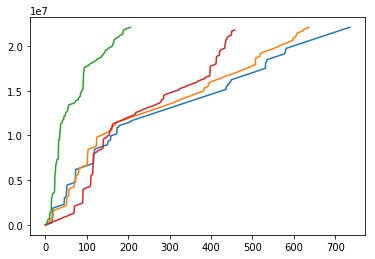

In [254]:
plt.plot(start1)
plt.plot(start2)
plt.plot(start3)
plt.plot(start4)

In [255]:
print('Number of 1min wake epochs in control1 = ',len(sham_extract1))
print('Number of 1min wake epochs in control2 = ',len(sham_extract2))
print('Number of 1min wake epochs in TBI1 = ',len(tbi_extract1))
print('Number of 1min wake epochs in TBI2 = ',len(tbi_extract2))

Number of 1min wake epochs in control1 =  736
Number of 1min wake epochs in control2 =  637
Number of 1min wake epochs in TBI1 =  207
Number of 1min wake epochs in TBI2 =  458


In [256]:
print('Number of samples in each epoch = (256*60) = ',len(sham_extract1[0]))

Number of samples in each epoch = (256*60) =  15360


Define filter

In [257]:
def butter_bandpass(lowcut, highcut, fs, order): #design bandpass filter
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band', analog=False)
    return b, a
def butter_bandpass_filter(data, lowcut, highcut, fs, order):
    b, a = butter_bandpass(lowcut, highcut, fs, order)
    y = lfilter(b, a, data)
    return y

Filter data

In [258]:
s1=(len(sham_extract1),256*60)
sham_fil_theta1=np.zeros(s1)
sham_fil_alpha1=np.zeros(s1)
sham_fil_sigma1=np.zeros(s1)
sham_fil_beta1=np.zeros(s1)
sham_fil_gama1=np.zeros(s1)
sham_fil_all1=np.zeros(s1)

for i in range(len(sham_extract1)):
    sham_fil_theta1[i]= butter_bandpass_filter(sham_extract1[i], 4, 7.5, 256, 6)
    sham_fil_alpha1[i]= butter_bandpass_filter(sham_extract1[i], 8, 12, 256, 6)
    sham_fil_sigma1[i] = butter_bandpass_filter(sham_extract1[i], 13, 16, 256, 6)
    sham_fil_beta1[i] = butter_bandpass_filter(sham_extract1[i], 16.5, 25, 256, 6)
    sham_fil_gama1[i] = butter_bandpass_filter(sham_extract1[i], 30, 35, 256, 6)
    sham_fil_all1[i] = butter_bandpass_filter(sham_extract1[i], 4, 35, 256, 6)
    
sham_fft_theta1=[0]*len(sham_extract1)
sham_fft_alpha1=[0]*len(sham_extract1)
sham_fft_sigma1=[0]*len(sham_extract1)
sham_fft_beta1=[0]*len(sham_extract1)
sham_fft_gama1=[0]*len(sham_extract1)
sham_fft_all1=[0]*len(sham_extract1)

for i in range(len(sham_extract1)):
    sham_fft_theta1[i] = (abs(np.fft.fft(sham_fil_theta1[i])))**2
    sham_fft_alpha1[i] = (abs(np.fft.fft(sham_fil_alpha1[i])))**2
    sham_fft_sigma1[i] = (abs(np.fft.fft(sham_fil_sigma1[i])))**2
    sham_fft_beta1[i] = (abs(np.fft.fft(sham_fil_beta1[i])))**2
    sham_fft_gama1[i] = (abs(np.fft.fft(sham_fil_gama1[i])))**2
    sham_fft_all1[i] = (abs(np.fft.fft(sham_fil_all1[i])))**2

sham_mean_theta1=np.mean(sham_fft_theta1,axis=1)
sham_mean_alpha1=np.mean(sham_fft_alpha1,axis=1)
sham_mean_sigma1=np.mean(sham_fft_sigma1,axis=1)
sham_mean_beta1=np.mean(sham_fft_beta1,axis=1)
sham_mean_gama1=np.mean(sham_fft_gama1,axis=1)
sham_mean_all1=np.mean(sham_fft_all1,axis=1)

In [259]:
s2=(len(sham_extract2),256*60)
sham_fil_theta2=np.zeros(s2)
sham_fil_alpha2=np.zeros(s2)
sham_fil_sigma2=np.zeros(s2)
sham_fil_beta2=np.zeros(s2)
sham_fil_gama2=np.zeros(s2)
sham_fil_all2=np.zeros(s2)

for i in range(len(sham_extract2)):
    sham_fil_theta2[i]= butter_bandpass_filter(sham_extract2[i], 4, 7.5, 256, 6)
    sham_fil_alpha2[i]= butter_bandpass_filter(sham_extract2[i], 8, 12, 256, 6)
    sham_fil_sigma2[i] = butter_bandpass_filter(sham_extract2[i], 13, 16, 256, 6)
    sham_fil_beta2[i] = butter_bandpass_filter(sham_extract2[i], 16.5, 25, 256, 6)
    sham_fil_gama2[i] = butter_bandpass_filter(sham_extract2[i], 30, 35, 256, 6)
    sham_fil_all2[i] = butter_bandpass_filter(sham_extract2[i], 4, 35, 256, 6)
    
sham_fft_theta2=[0]*len(sham_extract2)
sham_fft_alpha2=[0]*len(sham_extract2)
sham_fft_sigma2=[0]*len(sham_extract2)
sham_fft_beta2=[0]*len(sham_extract2)
sham_fft_gama2=[0]*len(sham_extract2)
sham_fft_all2=[0]*len(sham_extract2)

for i in range(len(sham_extract2)):
    sham_fft_theta2[i] = (abs(np.fft.fft(sham_fil_theta2[i])))**2
    sham_fft_alpha2[i] = (abs(np.fft.fft(sham_fil_alpha2[i])))**2
    sham_fft_sigma2[i] = (abs(np.fft.fft(sham_fil_sigma2[i])))**2
    sham_fft_beta2[i] = (abs(np.fft.fft(sham_fil_beta2[i])))**2
    sham_fft_gama2[i] = (abs(np.fft.fft(sham_fil_gama2[i])))**2
    sham_fft_all2[i] = (abs(np.fft.fft(sham_fil_all2[i])))**2

sham_mean_theta2=np.mean(sham_fft_theta2,axis=1)
sham_mean_alpha2=np.mean(sham_fft_alpha2,axis=1)
sham_mean_sigma2=np.mean(sham_fft_sigma2,axis=1)
sham_mean_beta2=np.mean(sham_fft_beta2,axis=1)
sham_mean_gama2=np.mean(sham_fft_gama2,axis=1)
sham_mean_all2=np.mean(sham_fft_all2,axis=1)

In [260]:
s3=(len(tbi_extract1),256*60)
tbi_fil_theta1=np.zeros(s3)
tbi_fil_alpha1=np.zeros(s3)
tbi_fil_sigma1=np.zeros(s3)
tbi_fil_beta1=np.zeros(s3)
tbi_fil_gama1=np.zeros(s3)
tbi_fil_all1=np.zeros(s3)

for i in range(len(tbi_extract1)):
    tbi_fil_theta1[i]= butter_bandpass_filter(tbi_extract1[i], 4, 7.5, 256, 6)
    tbi_fil_alpha1[i]= butter_bandpass_filter(tbi_extract1[i], 8, 12, 256, 6)
    tbi_fil_sigma1[i] = butter_bandpass_filter(tbi_extract1[i], 13, 16, 256, 6)
    tbi_fil_beta1[i] = butter_bandpass_filter(tbi_extract1[i], 16.5, 25, 256, 6)
    tbi_fil_gama1[i] = butter_bandpass_filter(tbi_extract1[i], 30, 35, 256, 6)
    tbi_fil_all1[i] = butter_bandpass_filter(tbi_extract1[i], 4, 35, 256, 6)
    
tbi_fft_theta1=[0]*len(tbi_extract1)
tbi_fft_alpha1=[0]*len(tbi_extract1)
tbi_fft_sigma1=[0]*len(tbi_extract1)
tbi_fft_beta1=[0]*len(tbi_extract1)
tbi_fft_gama1=[0]*len(tbi_extract1)
tbi_fft_all1=[0]*len(tbi_extract1)

for i in range(len(tbi_extract1)):
    tbi_fft_theta1[i] = (abs(np.fft.fft(tbi_fil_theta1[i])))**2
    tbi_fft_alpha1[i] = (abs(np.fft.fft(tbi_fil_alpha1[i])))**2
    tbi_fft_sigma1[i] = (abs(np.fft.fft(tbi_fil_sigma1[i])))**2
    tbi_fft_beta1[i] = (abs(np.fft.fft(tbi_fil_beta1[i])))**2
    tbi_fft_gama1[i] = (abs(np.fft.fft(tbi_fil_gama1[i])))**2
    tbi_fft_all1[i] = (abs(np.fft.fft(tbi_fil_all1[i])))**2

tbi_mean_theta1=np.mean(tbi_fft_theta1,axis=1)
tbi_mean_alpha1=np.mean(tbi_fft_alpha1,axis=1)
tbi_mean_sigma1=np.mean(tbi_fft_sigma1,axis=1)
tbi_mean_beta1=np.mean(tbi_fft_beta1,axis=1)
tbi_mean_gama1=np.mean(tbi_fft_gama1,axis=1)
tbi_mean_all1=np.mean(tbi_fft_all1,axis=1)

In [261]:
s4=(len(tbi_extract2),256*60)
tbi_fil_theta2=np.zeros(s4)
tbi_fil_alpha2=np.zeros(s4)
tbi_fil_sigma2=np.zeros(s4)
tbi_fil_beta2=np.zeros(s4)
tbi_fil_gama2=np.zeros(s4)
tbi_fil_all2=np.zeros(s4)

for i in range(len(tbi_extract2)):
    tbi_fil_theta2[i]= butter_bandpass_filter(tbi_extract2[i], 4, 7.5, 256, 6)
    tbi_fil_alpha2[i]= butter_bandpass_filter(tbi_extract2[i], 8, 12, 256, 6)
    tbi_fil_sigma2[i] = butter_bandpass_filter(tbi_extract2[i], 13, 16, 256, 6)
    tbi_fil_beta2[i] = butter_bandpass_filter(tbi_extract2[i], 16.5, 25, 256, 6)
    tbi_fil_gama2[i] = butter_bandpass_filter(tbi_extract2[i], 30, 35, 256, 6)
    tbi_fil_all2[i] = butter_bandpass_filter(tbi_extract2[i], 4, 35, 256, 6)
    
tbi_fft_theta2=[0]*len(tbi_extract2)
tbi_fft_alpha2=[0]*len(tbi_extract2)
tbi_fft_sigma2=[0]*len(tbi_extract2)
tbi_fft_beta2=[0]*len(tbi_extract2)
tbi_fft_gama2=[0]*len(tbi_extract2)
tbi_fft_all2=[0]*len(tbi_extract2)

for i in range(len(tbi_extract2)):
    tbi_fft_theta2[i] = (abs(np.fft.fft(tbi_fil_theta2[i])))**2
    tbi_fft_alpha2[i] = (abs(np.fft.fft(tbi_fil_alpha2[i])))**2
    tbi_fft_sigma2[i] = (abs(np.fft.fft(tbi_fil_sigma2[i])))**2
    tbi_fft_beta2[i] = (abs(np.fft.fft(tbi_fil_beta2[i])))**2
    tbi_fft_gama2[i] = (abs(np.fft.fft(tbi_fil_gama2[i])))**2
    tbi_fft_all2[i] = (abs(np.fft.fft(tbi_fil_all2[i])))**2

tbi_mean_theta2=np.mean(tbi_fft_theta2,axis=1)
tbi_mean_alpha2=np.mean(tbi_fft_alpha2,axis=1)
tbi_mean_sigma2=np.mean(tbi_fft_sigma2,axis=1)
tbi_mean_beta2=np.mean(tbi_fft_beta2,axis=1)
tbi_mean_gama2=np.mean(tbi_fft_gama2,axis=1)
tbi_mean_all2=np.mean(tbi_fft_all2,axis=1)

Create Dataframe

In [3052]:
new_sham1= pd.DataFrame({
    'mean_theta':sham_mean_theta1,
    'mean_alpha':sham_mean_alpha1,
    'mean_sigma':sham_mean_sigma1,
    'mean_beta':sham_mean_beta1,
    'mean_gama':sham_mean_gama1,
    #'low_high':sham_mean_theta1/sham_mean_alpha1,
    'label':0
})


In [3053]:
new_sham2= pd.DataFrame({
    'mean_theta':sham_mean_theta2,
    'mean_alpha':sham_mean_alpha2,
    'mean_sigma':sham_mean_sigma2,
    'mean_beta':sham_mean_beta2,
    'mean_gama':sham_mean_gama2,
    #'low_high':sham_mean_theta2/sham_mean_alpha2,
    'label':0
})


In [3054]:
new_tbi1= pd.DataFrame({
    'mean_theta':tbi_mean_theta1,
    'mean_alpha':tbi_mean_alpha1,
    'mean_sigma':tbi_mean_sigma1,
    'mean_beta':tbi_mean_beta1,
    'mean_gama':tbi_mean_gama1,
    #'low_high':tbi_mean_theta1/tbi_mean_alpha1,
    'label':1
})


In [3055]:
new_tbi2= pd.DataFrame({
    'mean_theta':tbi_mean_theta2,
    'mean_alpha':tbi_mean_alpha2,
    'mean_sigma':tbi_mean_sigma2,
    'mean_beta':tbi_mean_beta2,
    'mean_gama':tbi_mean_gama2,
    #'low_high':tbi_mean_theta2/tbi_mean_alpha2,
    'label':1
})


In [2303]:
#......................................................................................................................

In [262]:
base_sham_theta1=np.mean(sham_mean_theta1[0:5])
base_sham_alpha1=np.mean(sham_mean_alpha1[0:5])
base_sham_sigma1=np.mean(sham_mean_sigma1[0:5])
base_sham_beta1=np.mean(sham_mean_beta1[0:5])
base_sham_gama1=np.mean(sham_mean_gama1[0:5])
base_sham_theta2=np.mean(sham_mean_theta2[0:5])
base_sham_alpha2=np.mean(sham_mean_alpha2[0:5])
base_sham_sigma2=np.mean(sham_mean_sigma2[0:5])
base_sham_beta2=np.mean(sham_mean_beta2[0:5])
base_sham_gama2=np.mean(sham_mean_gama2[0:5])

base_tbi_theta1=np.mean(tbi_mean_theta1[0:5])
base_tbi_alpha1=np.mean(tbi_mean_alpha1[0:5])
base_tbi_sigma1=np.mean(tbi_mean_sigma1[0:5])
base_tbi_beta1=np.mean(tbi_mean_beta1[0:5])
base_tbi_gama1=np.mean(tbi_mean_gama1[0:5])
base_tbi_theta2=np.mean(tbi_mean_theta2[0:5])
base_tbi_alpha2=np.mean(tbi_mean_alpha2[0:5])
base_tbi_sigma2=np.mean(tbi_mean_sigma2[0:5])
base_tbi_beta2=np.mean(tbi_mean_beta2[0:5])
base_tbi_gama2=np.mean(tbi_mean_gama2[0:5])

In [263]:
base_sham_theta=(base_sham_theta1+base_sham_theta2)/2.0
base_sham_alpha=(base_sham_alpha1+base_sham_alpha2)/2.0
base_sham_sigma=(base_sham_sigma1+base_sham_sigma2)/2.0
base_sham_beta=(base_sham_beta1+base_sham_beta2)/2.0
base_sham_gama=(base_sham_gama1+base_sham_gama2)/2.0

In [264]:
base_tbi_theta=(base_tbi_theta1+base_tbi_theta2)/2.0
base_tbi_alpha=(base_tbi_alpha1+base_tbi_alpha2)/2.0
base_tbi_sigma=(base_tbi_sigma1+base_tbi_sigma2)/2.0
base_tbi_beta=(base_tbi_beta1+base_tbi_beta2)/2.0
base_tbi_gama=(base_tbi_gama1+base_tbi_gama2)/2.0

In [265]:
new_sham1= pd.DataFrame({
    'mean_theta':10*np.log10(sham_mean_theta1/base_sham_theta),
    'mean_alpha':10*np.log10(sham_mean_alpha1/base_sham_alpha),
    'mean_sigma':10*np.log10(sham_mean_sigma1/base_sham_sigma),
    'mean_beta':10*np.log10(sham_mean_beta1/base_sham_beta),
    'mean_gama':10*np.log10(sham_mean_gama1/base_sham_gama),
    #'low_high':sham_mean_theta1/sham_mean_alpha1,
    'label':0
})


In [266]:
new_sham2= pd.DataFrame({
    'mean_theta':10*np.log10(sham_mean_theta2/base_sham_theta),
    'mean_alpha':10*np.log10(sham_mean_alpha2/base_sham_alpha),
    'mean_sigma':10*np.log10(sham_mean_sigma2/base_sham_sigma),
    'mean_beta':10*np.log10(sham_mean_beta2/base_sham_beta),
    'mean_gama':10*np.log10(sham_mean_gama2/base_sham_gama),
    #'low_high':sham_mean_theta2/sham_mean_alpha2,
    'label':0
})


In [267]:
new_tbi1= pd.DataFrame({
    'mean_theta':10*np.log10(tbi_mean_theta1/base_tbi_theta),
    'mean_alpha':10*np.log10(tbi_mean_alpha1/base_tbi_alpha),
    'mean_sigma':10*np.log10(tbi_mean_sigma1/base_tbi_sigma),
    'mean_beta':10*np.log10(tbi_mean_beta1/base_tbi_beta),
    'mean_gama':10*np.log10(tbi_mean_gama1/base_tbi_gama),
    #'low_high':tbi_mean_theta1/tbi_mean_alpha1,
    'label':1
})


In [268]:
new_tbi2= pd.DataFrame({
    'mean_theta':10*np.log10(tbi_mean_theta2/base_tbi_theta),
    'mean_alpha':10*np.log10(tbi_mean_alpha2/base_tbi_alpha),
    'mean_sigma':10*np.log10(tbi_mean_sigma2/base_tbi_sigma),
    'mean_beta':10*np.log10(tbi_mean_beta2/base_tbi_beta),
    'mean_gama':10*np.log10(tbi_mean_gama2/base_tbi_gama),
    #'low_high':tbi_mean_theta2/tbi_mean_alpha2,
    'label':1
})


In [269]:
#.......................................................................................................................

In [270]:
big_df1=new_sham2.append(new_tbi1, ignore_index=True)
big_df2=new_sham1.append(new_tbi2, ignore_index=True)

big_df3=big_df1.append(big_df2, ignore_index=True)

In [271]:
big_df3

,mean_theta,mean_alpha,mean_sigma,mean_beta,mean_gama,label
0,2.249081,1.795331,3.154765,1.563698,-1.296390,0
1,0.529354,-0.082340,1.165069,0.455122,-0.523414,0
2,0.448588,-1.001989,-0.810481,-0.063049,-0.283242,0
3,0.271857,-3.007459,-0.863640,0.106864,0.726119,0
4,0.681578,-3.183712,-1.060167,-0.341580,-0.862848,0
5,1.299401,-2.145363,-0.908401,-0.143052,-0.630990,0
6,0.929685,-1.503779,-0.292436,0.025214,-0.673037,0
7,1.101506,-0.817115,-0.302595,0.180078,0.078857,0
8,0.529049,-1.860647,-0.664194,-0.114490,-0.437528,0
9,0.164740,0.393608,-0.206184,-0.438792,0.061938,0


In [272]:
from sklearn.utils import shuffle
big_df3 = shuffle(big_df3)

Mean removal and feature normalization

In [273]:
col_mean=[0]*(len(big_df3.iloc[0])-1)
col_std=[0]*(len(big_df3.iloc[0])-1)
for i in range(len(big_df3.iloc[0])-1):
    col_mean[i]=np.mean(big_df3.iloc[:,i])
    big_df3.iloc[:,i]=big_df3.iloc[:,i]-col_mean[i]
    col_std[i]=np.std(big_df3.iloc[:,i])
    big_df3.iloc[:,i]=big_df3.iloc[:,i]/col_std[i]

In [275]:
big_df3.head()

,mean_theta,mean_alpha,mean_sigma,mean_beta,mean_gama,label
395,0.479311,0.842004,2.413863,0.372349,-1.672346,0
849,-0.554723,0.199975,-0.061114,-0.590699,0.442338,0
1378,-0.546662,-0.695153,-0.046225,-0.807504,0.800361,0
1356,-0.905798,0.503755,-0.225176,-0.298019,-0.256472,0
1425,0.570613,1.283072,4.100124,2.314569,-1.503626,0


In [276]:
from sklearn.model_selection import train_test_split

X=big_df3.drop('label',axis=1)
y=big_df3['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
# Fit only to the training data
#scaler.fit(X_train)
# Now apply the transformations to the data:
#X_train = scaler.transform(X_train)
#X_test = scaler.transform(X_test)

In [277]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)
predictions=dtree.predict(X_test)

from sklearn.metrics import accuracy_score
print('accuracy=') 
accuracy_score(y_test, predictions, normalize=True, sample_weight=None)

accuracy=


0.988562091503268

In [278]:
print('Classification report for decision tree')
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))

Classification report for decision tree
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       408
           1       0.98      0.99      0.98       204

   micro avg       0.99      0.99      0.99       612
   macro avg       0.99      0.99      0.99       612
weighted avg       0.99      0.99      0.99       612



In [279]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors=3)  
classifier.fit(X_train, y_train) 
y_pred = classifier.predict(X_test) 
print('Classification report for kNN')
print(classification_report(y_test, y_pred))  

Classification report for kNN
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       408
           1       0.99      1.00      0.99       204

   micro avg       1.00      1.00      1.00       612
   macro avg       0.99      1.00      0.99       612
weighted avg       1.00      1.00      1.00       612



In [280]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred, normalize=True, sample_weight=None)

0.9950980392156863

Text(0, 0.5, 'Mean Error')

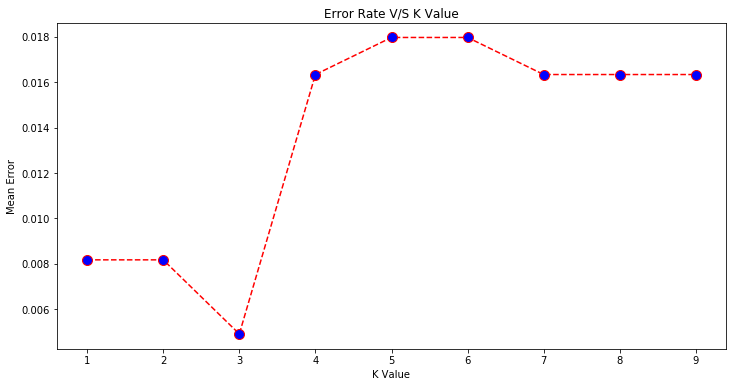

In [281]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 10, 1):  
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

plt.figure(figsize=(12, 6))  
plt.plot(range(1, 10, 1), error, color='red', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=10)
plt.title('Error Rate V/S K Value')  
plt.xlabel('K Value')  
plt.ylabel('Mean Error')

In [282]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(100,100),max_iter=10000)
mlp.fit(X_train,y_train)
predictions = mlp.predict(X_test)
print('Classification report for Neural_network')
print(classification_report(y_test,predictions))

Classification report for Neural_network
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       408
           1       0.99      0.99      0.99       204

   micro avg       0.99      0.99      0.99       612
   macro avg       0.99      0.99      0.99       612
weighted avg       0.99      0.99      0.99       612



In [283]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions, normalize=True, sample_weight=None)

0.9934640522875817

In [284]:
# Import the model we are using
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
clf.fit(X_train, y_train)

predictions = clf.predict(X_test)
print('Classification report for Random forest')
print(classification_report(y_test,predictions))

Classification report for Random forest
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       408
           1       0.99      0.99      0.99       204

   micro avg       0.99      0.99      0.99       612
   macro avg       0.99      0.99      0.99       612
weighted avg       0.99      0.99      0.99       612



D:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [285]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions, normalize=True, sample_weight=None)

0.9934640522875817

In [286]:
from sklearn.svm import SVC 

svclassifier = SVC(kernel='rbf')  
svclassifier.fit(X_train, y_train) 

predictions = svclassifier.predict(X_test) 
print('Classification report for SVM')
print(classification_report(y_test,predictions))

Classification report for SVM
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       408
           1       0.99      0.99      0.99       204

   micro avg       0.99      0.99      0.99       612
   macro avg       0.99      0.99      0.99       612
weighted avg       0.99      0.99      0.99       612



D:\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [287]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions, normalize=True, sample_weight=None)

0.9934640522875817

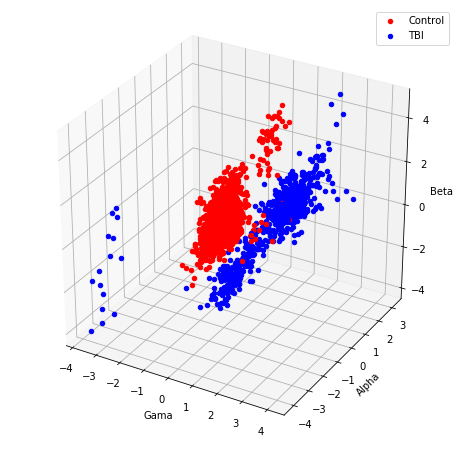

In [288]:
from mpl_toolkits.mplot3d import Axes3D
c=0
fig2 = plt.figure(figsize=(8,8))
ax = fig2.add_subplot(111, projection='3d')
for x in range(len(big_df3)):
    if big_df3.iloc[x,5]==0:
        l1=ax.scatter(big_df3.iloc[x,0],big_df3.iloc[x,1],big_df3.iloc[x,2], color='r',label='Control')
    else :
        l2=ax.scatter(big_df3.iloc[x,0],big_df3.iloc[x,1],big_df3.iloc[x,2],color='b',label='TBI')
plt.xlabel('Gama')
plt.ylabel('Alpha')
ax.set_zlabel('Beta')
plt.legend((l1,l2),('Control','TBI'),loc='upper right')
plt.show()

In [8]:
sham3=pd.read_csv('Sham104_BL5.csv', header=None, index_col=None)#load data
tbi3=pd.read_csv('TBI102_BL5.csv', header=None, index_col=None)#load data

sham3.columns=['Timestamp_Index','Wake','NREM','REM','EEG','EMG','Mouse_Label']
tbi3.columns=['Timestamp_Index','Wake','NREM','REM','EEG','EMG','Mouse_Label']

In [9]:
sham3.head()

,Timestamp_Index,Wake,NREM,REM,EEG,EMG,Mouse_Label
0,1.0,1,0,0,16.584,22.1190,0
1,2.0,1,0,0,-4.523,6.7722,0
2,3.0,1,0,0,-27.823,-34.7540,0
3,4.0,1,0,0,-50.163,8.5776,0
4,5.0,1,0,0,-64.828,-80.7940,0


In [10]:
tbi3.head()

,Timestamp_Index,Wake,NREM,REM,EEG,EMG,Mouse_Label
0,1.0,1,0,0,-55.381,-0.89944,1
1,2.0,1,0,0,-63.361,9.95310,1
2,3.0,1,0,0,-64.578,-6.32570,1
3,4.0,1,0,0,-60.115,9.04870,1
4,5.0,1,0,0,-49.836,3.62240,1


In [11]:
#extract 1min wake data from Control mouse
start5=[]
stop5=[]
check5=[]
sham_extract3=list()
j5=0
l5=0
for i in range((24*60*60*256)-60):
    if i == 0:
        if sham3.iloc[:,1][i]==1:
            if sum(sham3.iloc[:,1][i:i+(60*256)])==256*60:
                chunk5=sham3.iloc[:,4][i:i+(60*256)]
                sham_extract3.append(chunk5)

                j5=i
                start5.append(j5)
                k5=i+(60*256)-1
                stop5.append(k5)
                l5=l5+1
    else:
        if i > stop5[l5-1]:
            if sham3.iloc[:,1][i]==1:
                if sum(sham3.iloc[:,1][i:i+(60*256)])==256*60:
                    chunk5=sham3.iloc[:,4][i:i+(60*256)]
                    sham_extract3.append(chunk5)

                    j5=i
                    start5.append(j5)
                    k5=i+(60*256)-1
                    stop5.append(k5)
                    l5=l5+1
                    

In [12]:
len(sham_extract3)

922

In [13]:
#extract 1min wake data from TBI mouse
start6=[]
stop6=[]
check6=[]
tbi_extract3=list()
j6=0
l6=0
for i in range((24*60*60*256)-60):
    if i == 0:
        if tbi3.iloc[:,1][i]==1:
            if sum(tbi3.iloc[:,1][i:i+(60*256)])==256*60:
                chunk6=tbi3.iloc[:,4][i:i+(60*256)]
                tbi_extract3.append(chunk6)

                j6=i
                start6.append(j6)
                k6=i+(60*256)-1
                stop6.append(k6)
                l6=l6+1
    else:
        if i > stop6[l6-1]:
            if tbi3.iloc[:,1][i]==1:
                if sum(tbi3.iloc[:,1][i:i+(60*256)])==256*60:
                    chunk6=tbi3.iloc[:,4][i:i+(60*256)]
                    tbi_extract3.append(chunk6)

                    j6=i
                    start6.append(j6)
                    k6=i+(60*256)-1
                    stop6.append(k6)
                    l6=l6+1
                    


In [289]:
s5=(len(sham_extract3),256*60)
sham_fil_theta3=np.zeros(s5)
sham_fil_alpha3=np.zeros(s5)
sham_fil_sigma3=np.zeros(s5)
sham_fil_beta3=np.zeros(s5)
sham_fil_gama3=np.zeros(s5)
sham_fil_all3=np.zeros(s5)

for i in range(len(sham_extract3)):
    sham_fil_theta3[i]= butter_bandpass_filter(sham_extract3[i], 4, 7.5, 256, 6)
    sham_fil_alpha3[i]= butter_bandpass_filter(sham_extract3[i], 8, 12, 256, 6)
    sham_fil_sigma3[i] = butter_bandpass_filter(sham_extract3[i], 13, 16, 256, 6)
    sham_fil_beta3[i] = butter_bandpass_filter(sham_extract3[i], 16.5, 25, 256, 6)
    sham_fil_gama3[i] = butter_bandpass_filter(sham_extract3[i], 30, 35, 256, 6)
    sham_fil_all3[i] = butter_bandpass_filter(sham_extract3[i], 4, 35, 256, 6)
    
sham_fft_theta3=[0]*len(sham_extract3)
sham_fft_alpha3=[0]*len(sham_extract3)
sham_fft_sigma3=[0]*len(sham_extract3)
sham_fft_beta3=[0]*len(sham_extract3)
sham_fft_gama3=[0]*len(sham_extract3)
sham_fft_all3=[0]*len(sham_extract3)

for i in range(len(sham_extract3)):
    sham_fft_theta3[i] = (abs(np.fft.fft(sham_fil_theta3[i])))**2
    sham_fft_alpha3[i] = (abs(np.fft.fft(sham_fil_alpha3[i])))**2
    sham_fft_sigma3[i] = (abs(np.fft.fft(sham_fil_sigma3[i])))**2
    sham_fft_beta3[i] = (abs(np.fft.fft(sham_fil_beta3[i])))**2
    sham_fft_gama3[i] = (abs(np.fft.fft(sham_fil_gama3[i])))**2
    sham_fft_all3[i] = (abs(np.fft.fft(sham_fil_all3[i])))**2

sham_mean_theta3=np.mean(sham_fft_theta3,axis=1)
sham_mean_alpha3=np.mean(sham_fft_alpha3,axis=1)
sham_mean_sigma3=np.mean(sham_fft_sigma3,axis=1)
sham_mean_beta3=np.mean(sham_fft_beta3,axis=1)
sham_mean_gama3=np.mean(sham_fft_gama3,axis=1)
sham_mean_all3=np.mean(sham_fft_all3,axis=1)

In [290]:
s6=(len(tbi_extract3),256*60)
tbi_fil_theta3=np.zeros(s6)
tbi_fil_alpha3=np.zeros(s6)
tbi_fil_sigma3=np.zeros(s6)
tbi_fil_beta3=np.zeros(s6)
tbi_fil_gama3=np.zeros(s6)
tbi_fil_all3=np.zeros(s6)

for i in range(len(tbi_extract3)):
    tbi_fil_theta3[i]= butter_bandpass_filter(tbi_extract3[i], 4, 7.5, 256, 6)
    tbi_fil_alpha3[i]= butter_bandpass_filter(tbi_extract3[i], 8, 12, 256, 6)
    tbi_fil_sigma3[i] = butter_bandpass_filter(tbi_extract3[i], 13, 16, 256, 6)
    tbi_fil_beta3[i] = butter_bandpass_filter(tbi_extract3[i], 16.5, 25, 256, 6)
    tbi_fil_gama3[i] = butter_bandpass_filter(tbi_extract3[i], 30, 35, 256, 6)
    tbi_fil_all3[i] = butter_bandpass_filter(tbi_extract3[i], 4, 35, 256, 6)
    
tbi_fft_theta3=[0]*len(tbi_extract3)
tbi_fft_alpha3=[0]*len(tbi_extract3)
tbi_fft_sigma3=[0]*len(tbi_extract3)
tbi_fft_beta3=[0]*len(tbi_extract3)
tbi_fft_gama3=[0]*len(tbi_extract3)
tbi_fft_all3=[0]*len(tbi_extract3)

for i in range(len(tbi_extract3)):
    tbi_fft_theta3[i] = (abs(np.fft.fft(tbi_fil_theta3[i])))**2
    tbi_fft_alpha3[i] = (abs(np.fft.fft(tbi_fil_alpha3[i])))**2
    tbi_fft_sigma3[i] = (abs(np.fft.fft(tbi_fil_sigma3[i])))**2
    tbi_fft_beta3[i] = (abs(np.fft.fft(tbi_fil_beta3[i])))**2
    tbi_fft_gama3[i] = (abs(np.fft.fft(tbi_fil_gama3[i])))**2
    tbi_fft_all3[i] = (abs(np.fft.fft(tbi_fil_all3[i])))**2

tbi_mean_theta3=np.mean(tbi_fft_theta3,axis=1)
tbi_mean_alpha3=np.mean(tbi_fft_alpha3,axis=1)
tbi_mean_sigma3=np.mean(tbi_fft_sigma3,axis=1)
tbi_mean_beta3=np.mean(tbi_fft_beta3,axis=1)
tbi_mean_gama3=np.mean(tbi_fft_gama3,axis=1)
tbi_mean_all3=np.mean(tbi_fft_all3,axis=1)

In [3064]:
new_sham3= pd.DataFrame({
    'mean_theta':sham_mean_theta3,
    'mean_alpha':sham_mean_alpha3,
    'mean_sigma':sham_mean_sigma3,
    'mean_beta':sham_mean_beta3,
    'mean_gama':sham_mean_gama3,
    #'low_high':sham_mean_theta3/sham_mean_alpha3,
    'label':0
})


In [3065]:
new_tbi3= pd.DataFrame({
    'mean_theta':tbi_mean_theta3,
    'mean_alpha':tbi_mean_alpha3,
    'mean_sigma':tbi_mean_sigma3,
    'mean_beta':tbi_mean_beta3,
    'mean_gama':tbi_mean_gama3,
    #'low_high':tbi_mean_theta3/tbi_mean_alpha3,
    'label':1
})


In [34]:
#..........................................................................

In [35]:
base_sham_theta3=np.mean(sham_mean_theta3[0:15])
base_sham_alpha3=np.mean(sham_mean_alpha3[0:15])
base_sham_sigma3=np.mean(sham_mean_sigma3[0:15])
base_sham_beta3=np.mean(sham_mean_beta3[0:15])
base_sham_gama3=np.mean(sham_mean_gama3[0:15])


base_tbi_theta3=np.mean(tbi_mean_theta3[0:15])
base_tbi_alpha3=np.mean(tbi_mean_alpha3[0:15])
base_tbi_sigma3=np.mean(tbi_mean_sigma3[0:15])
base_tbi_beta3=np.mean(tbi_mean_beta3[0:15])
base_tbi_gama3=np.mean(tbi_mean_gama3[0:15])

In [36]:
base_sham_theta=(base_sham_theta1+base_sham_theta2+base_sham_theta3)/3.0
base_sham_alpha=(base_sham_alpha1+base_sham_alpha2+base_sham_alpha3)/3.0
base_sham_sigma=(base_sham_sigma1+base_sham_sigma2+base_sham_sigma3)/3.0
base_sham_beta=(base_sham_beta1+base_sham_beta2+base_sham_beta3)/3.0
base_sham_gama=(base_sham_gama1+base_sham_gama2+base_sham_gama3)/3.0

In [2891]:
base_tbi_theta=(base_tbi_theta1+base_tbi_theta2+base_tbi_theta3)/3.0
base_tbi_alpha=(base_tbi_alpha1+base_tbi_alpha2+base_tbi_alpha3)/3.0
base_tbi_sigma=(base_tbi_sigma1+base_tbi_sigma2+base_tbi_sigma3)/3.0
base_tbi_beta=(base_tbi_beta1+base_tbi_beta2+base_tbi_beta3)/3.0
base_tbi_gama=(base_tbi_gama1+base_tbi_gama2+base_tbi_gama3)/3.0

In [291]:
new_sham3= pd.DataFrame({
    'mean_theta':10*np.log10(sham_mean_theta3/base_sham_theta),
    'mean_alpha':10*np.log10(sham_mean_alpha3/base_sham_alpha),
    'mean_sigma':10*np.log10(sham_mean_sigma3/base_sham_sigma),
    'mean_beta':10*np.log10(sham_mean_beta3/base_sham_beta),
    'mean_gama':10*np.log10(sham_mean_gama3/base_sham_gama),
    #'low_high':sham_mean_theta3/sham_mean_alpha3,
    'label':0
})


In [292]:
new_tbi3= pd.DataFrame({
    'mean_theta':10*np.log10(tbi_mean_theta3/base_tbi_theta),
    'mean_alpha':10*np.log10(tbi_mean_alpha3/base_tbi_alpha),
    'mean_sigma':10*np.log10(tbi_mean_sigma3/base_tbi_sigma),
    'mean_beta':10*np.log10(tbi_mean_beta3/base_tbi_beta),
    'mean_gama':10*np.log10(tbi_mean_gama3/base_tbi_gama),
    #'low_high':tbi_mean_theta3/tbi_mean_alpha3,
    'label':1
})


In [293]:
#..........................................................................

In [297]:
new_big_df=new_sham3.append(new_tbi3, ignore_index=True)

In [295]:
new_big_df=new_big_df4.append(big_df3, ignore_index=True)

In [298]:
new_big_df

,mean_theta,mean_alpha,mean_sigma,mean_beta,mean_gama,label
0,0.124515,-0.818452,0.134485,1.154808,1.552650,0
1,0.089209,-0.404844,0.926770,1.327693,0.594123,0
2,-0.433487,-0.208367,1.427958,1.547028,1.058829,0
3,1.166104,-0.192689,0.670886,1.141923,1.699727,0
4,0.873879,2.109097,2.111993,2.140555,0.650500,0
5,0.938936,0.797123,1.263954,1.823474,0.937108,0
6,-0.061630,1.581360,0.158367,1.312295,2.299411,0
7,0.208198,1.412951,0.914494,1.442370,1.626946,0
8,0.490367,-0.650834,0.004254,1.150213,1.357658,0
9,1.342366,1.648596,0.829585,1.088652,1.671078,0


In [299]:
from sklearn.utils import shuffle
new_big_df = shuffle(new_big_df)

In [300]:
for i in range(len(new_big_df.iloc[0])-1):
    #col_mean[i]=np.mean(new_big_df.iloc[:,i])
    new_big_df.iloc[:,i]=new_big_df.iloc[:,i]-col_mean[i]
    #col_std[i]=np.max(new_big_df.iloc[:,i])
    new_big_df.iloc[:,i]=new_big_df.iloc[:,i]/col_std[i]

In [301]:
new_big_df.head()

,mean_theta,mean_alpha,mean_sigma,mean_beta,mean_gama,label
445,-0.274492,-0.102467,1.436237,1.695577,2.824696,0
941,0.552686,0.176403,0.335866,-0.234474,-4.145483,1
1568,-0.392040,-1.063157,-3.111906,-3.631702,-2.847403,1
653,1.123049,0.820634,2.591030,4.304368,2.152437,0
556,-0.501273,-0.230683,1.310554,1.807636,1.991437,0


In [302]:
from sklearn.model_selection import train_test_split

#X=new_big_df.drop('label',axis=1)
#y=new_big_df['label']
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

X_train=big_df3.drop('label',axis=1)
y_train=big_df3['label']
X_test=new_big_df.drop('label',axis=1)
y_test=new_big_df['label']

#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
## Fit only to the training data
#scaler.fit(X_train)
## Now apply the transformations to the data:
#X_train = scaler.transform(X_train)
#X_test = scaler.transform(X_test)


In [331]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)
predictions=dtree.predict(X_test)

print('Classification report for decision tree')
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))

Classification report for decision tree
              precision    recall  f1-score   support

           0       0.70      0.80      0.75       922
           1       0.76      0.65      0.70       901

   micro avg       0.73      0.73      0.73      1823
   macro avg       0.73      0.73      0.73      1823
weighted avg       0.73      0.73      0.73      1823



In [332]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions, normalize=True, sample_weight=None)

0.7284695556774547

In [337]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors=6)  
classifier.fit(X_train, y_train) 
y_pred = classifier.predict(X_test) 
print('Classification report for kNN')
print(classification_report(y_test, y_pred))  

Classification report for kNN
              precision    recall  f1-score   support

           0       0.78      0.64      0.70       922
           1       0.69      0.81      0.74       901

   micro avg       0.72      0.72      0.72      1823
   macro avg       0.73      0.72      0.72      1823
weighted avg       0.73      0.72      0.72      1823



In [338]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred, normalize=True, sample_weight=None)

0.7235326385079539

Text(0, 0.5, 'Mean Error')

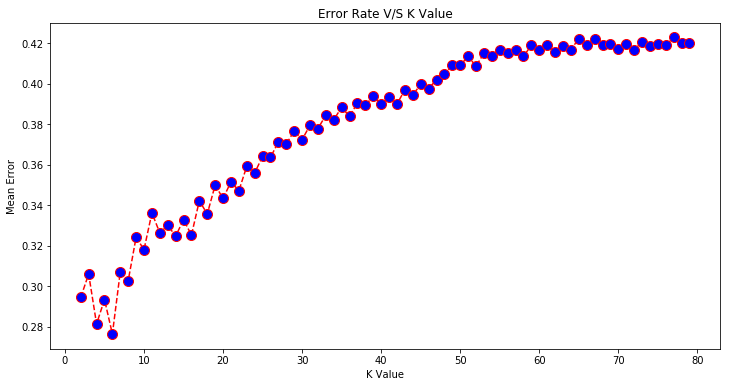

In [336]:
error = []

# Calculating error for K values between 1 and 40
for i in range(2, 80, 1):  
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

plt.figure(figsize=(12, 6))  
plt.plot(range(2, 80, 1), error, color='red', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=10)
plt.title('Error Rate V/S K Value')  
plt.xlabel('K Value')  
plt.ylabel('Mean Error')

In [343]:
from sklearn.neural_network import MLPClassifier
#mlp = MLPClassifier(hidden_layer_sizes=(10,10,10,10,10),max_iter=10000)
mlp = MLPClassifier(hidden_layer_sizes=(100,100),max_iter=10000)
mlp.fit(X_train,y_train)
predictions = mlp.predict(X_test)
print('Classification report for Neural_network')
print(classification_report(y_test,predictions))

Classification report for Neural_network
              precision    recall  f1-score   support

           0       0.44      0.59      0.51       922
           1       0.35      0.23      0.28       901

   micro avg       0.41      0.41      0.41      1823
   macro avg       0.40      0.41      0.39      1823
weighted avg       0.40      0.41      0.39      1823



In [344]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions, normalize=True, sample_weight=None)

0.4125068568294021

In [347]:
# Import the model we are using
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
clf.fit(X_train, y_train)

predictions = clf.predict(X_test)
print('Classification report for Random forest')
print(classification_report(y_test,predictions))

Classification report for Random forest
              precision    recall  f1-score   support

           0       0.75      0.80      0.77       922
           1       0.78      0.72      0.75       901

   micro avg       0.76      0.76      0.76      1823
   macro avg       0.77      0.76      0.76      1823
weighted avg       0.76      0.76      0.76      1823



D:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [348]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions, normalize=True, sample_weight=None)

0.7635765222161273

In [361]:
from sklearn.svm import SVC 

svclassifier = SVC(kernel='rbf')  
svclassifier.fit(X_train, y_train) 

predictions = svclassifier.predict(X_test) 
print('Classification report for SVM')
print(classification_report(y_test,predictions))

Classification report for SVM
              precision    recall  f1-score   support

           0       0.81      0.53      0.64       922
           1       0.65      0.87      0.74       901

   micro avg       0.70      0.70      0.70      1823
   macro avg       0.73      0.70      0.69      1823
weighted avg       0.73      0.70      0.69      1823



In [362]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions, normalize=True, sample_weight=None)

0.7004936917169501

In [2480]:
from xgboost import XGBClassifier

In [295]:
model = XGBClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
#predictions = [round(value) for value in y_pred]

print('Classification report for Random forest')
print(classification_report(y_test,predictions))

Classification report for Random forest
              precision    recall  f1-score   support

           0       0.62      0.72      0.67       922
           1       0.66      0.54      0.59       901

   micro avg       0.63      0.63      0.63      1823
   macro avg       0.64      0.63      0.63      1823
weighted avg       0.64      0.63      0.63      1823



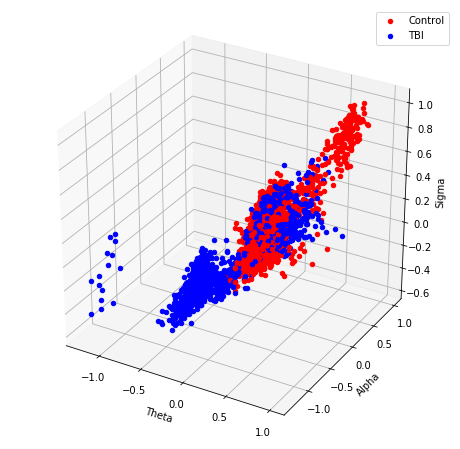

In [88]:
from mpl_toolkits.mplot3d import Axes3D
c=0
fig2 = plt.figure(figsize=(8,8))
ax = fig2.add_subplot(111, projection='3d')
for x in range(len(new_big_df)):
    if new_big_df.iloc[x,5]==0:
        l1=ax.scatter(new_big_df.iloc[x,0],new_big_df.iloc[x,1],new_big_df.iloc[x,2], color='r',label='Control')
    else :
        l2=ax.scatter(new_big_df.iloc[x,0],new_big_df.iloc[x,1],new_big_df.iloc[x,2],color='b',label='TBI')
plt.xlabel('Theta')
plt.ylabel('Alpha')
ax.set_zlabel('Sigma')
plt.legend((l1,l2),('Control','TBI'),loc='upper right')
plt.show()

In [519]:
df3=pd.read_csv('563_Stage.txt',header=None, index_col=None)
df3=df3.drop(df3.index[[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]])

df4=pd.read_csv('424_Stage.txt',header=None, index_col=None)
df4=df4.drop(df4.index[[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]])

In [520]:
x3=df3.loc[16]
a3=x3.str.split(expand=True)

x4=df4.loc[16]
a4=x4.str.split(expand=True)

In [521]:
for i in range(17,len(df3)+16):
    x3=df3.loc[i]
    b3=x3.str.split(expand=True)
    a3=a3.append(b3)
    
for i in range(17,len(df4)+16):
    x4=df4.loc[i]
    b4=x4.str.split(expand=True)
    a4=a4.append(b4)

In [522]:
a3.columns = a3.iloc[0]
a3 = a3[a3.iloc[:,20] != 'Stg']

a4.columns = a4.iloc[0]
a4 = a4[a4.iloc[:,20] != 'Stg']

In [523]:
import pyedflib
f3 = pyedflib.EdfReader("563.edf")

f4 = pyedflib.EdfReader("424.edf")

In [524]:
import mne
raw3 = mne.io.read_raw_edf("563.edf", preload=True)
raw4 = mne.io.read_raw_edf("424.edf", preload=True)

raw3_eeg = raw3[:, :][0]
raw4_eeg = raw4[:, :][0]

Extracting EDF parameters from 563.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 5227399  =      0.000 ... 26136.995 secs...


<ipython-input-524-aaed5c27b6c3>:2: RuntimeWarning: Interpolating stim channel. Events may jitter.
  raw3 = mne.io.read_raw_edf("563.edf", preload=True)


Extracting EDF parameters from 424.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 5531399  =      0.000 ... 27656.995 secs...


In [525]:
raw_control=(raw3_eeg[2,:])
raw_tbi=(raw4_eeg[2,:])

In [526]:
j3=0
k3=[0]*67
data_control=np.zeros((67,(200*60)))
for i in range(len(a3)-1):
    if j3==0:
        if a3.iloc[i,20]=='W':
            if a3.iloc[i+1,20]=='W':
                data_control[j3]=raw_control[i*200*30:i*200*30+(200*60)]
                k3[j3]=i+1
                j3=j3+1
                
    else:
        if i>k3[j3-1]:
            if a3.iloc[i,20]=='W':
                if a3.iloc[i+1,20]=='W':
                    data_control[j3]=raw_control[i*200*30:i*200*30+(200*60)]
                    k3[j3]=i+1
                    j3=j3+1
j3  

67

In [527]:
j4=0
k4=[0]*45
data_tbi=np.zeros((45,(200*60)))
for i in range(len(a4)-1):
    if j4==0:
        if a4.iloc[i,20]=='W':
            if a4.iloc[i+1,20]=='W':
                data_tbi[j4]=raw_tbi[i*200*30:i*200*30+(200*60)]
                k4[j4]=i+1
                j4=j4+1
                
    else:
        if i>k4[j4-1]:
            if a4.iloc[i,20]=='W':
                if a4.iloc[i+1,20]=='W':
                    data_tbi[j4]=raw_tbi[i*200*30:i*200*30+(200*60)]
                    k4[j4]=i+1
                    j4=j4+1
j4  

45

In [528]:
s3=(len(data_control),200*60)

fil_theta3=np.zeros(s3)
fil_alpha3=np.zeros(s3)
fil_sigma3=np.zeros(s3)
fil_beta3=np.zeros(s3)
fil_gama3=np.zeros(s3)

for i in range(len(data_control)):
    fil_theta3[i]= butter_bandpass_filter(data_control[i], 4, 7.5, 256, 6)
    fil_alpha3[i]= butter_bandpass_filter(data_control[i], 8, 12, 256, 6)
    fil_sigma3[i] = butter_bandpass_filter(data_control[i], 13, 16, 256, 6)
    fil_beta3[i] = butter_bandpass_filter(data_control[i], 16.5, 25, 256, 6)
    fil_gama3[i] = butter_bandpass_filter(data_control[i], 30, 35, 256, 6)
    
fft_wake_theta3=[0]*len(data_control)
fft_wake_alpha3=[0]*len(data_control)
fft_wake_sigma3=[0]*len(data_control)
fft_wake_beta3=[0]*len(data_control)
fft_wake_gama3=[0]*len(data_control)
for i in range(len(data_control)):
    fft_wake_theta3[i] = (abs(np.fft.fft(fil_theta3[i])))**2
    fft_wake_alpha3[i] = (abs(np.fft.fft(fil_alpha3[i])))**2
    fft_wake_sigma3[i] = (abs(np.fft.fft(fil_sigma3[i])))**2
    fft_wake_beta3[i] = (abs(np.fft.fft(fil_beta3[i])))**2
    fft_wake_gama3[i] = (abs(np.fft.fft(fil_gama3[i])))**2
mean_wake_theta3=np.mean(fft_wake_theta3,axis=1)
mean_wake_alpha3=np.mean(fft_wake_alpha3,axis=1)
mean_wake_sigma3=np.mean(fft_wake_sigma3,axis=1)
mean_wake_beta3=np.mean(fft_wake_beta3,axis=1)
mean_wake_gama3=np.mean(fft_wake_gama3,axis=1)

In [529]:
s4=(len(data_tbi),200*60)

fil_theta4=np.zeros(s4)
fil_alpha4=np.zeros(s4)
fil_sigma4=np.zeros(s4)
fil_beta4=np.zeros(s4)
fil_gama4=np.zeros(s4)

for i in range(len(data_tbi)):
    fil_theta4[i]= butter_bandpass_filter(data_tbi[i], 4, 7.5, 256, 6)
    fil_alpha4[i]= butter_bandpass_filter(data_tbi[i], 8, 12, 256, 6)
    fil_sigma4[i] = butter_bandpass_filter(data_tbi[i], 13, 16, 256, 6)
    fil_beta4[i] = butter_bandpass_filter(data_tbi[i], 16.5, 25, 256, 6)
    fil_gama4[i] = butter_bandpass_filter(data_tbi[i], 30, 35, 256, 6)
    
fft_wake_theta4=[0]*len(data_tbi)
fft_wake_alpha4=[0]*len(data_tbi)
fft_wake_sigma4=[0]*len(data_tbi)
fft_wake_beta4=[0]*len(data_tbi)
fft_wake_gama4=[0]*len(data_tbi)
for i in range(len(data_tbi)):
    fft_wake_theta4[i] = (abs(np.fft.fft(fil_theta4[i])))**2
    fft_wake_alpha4[i] = (abs(np.fft.fft(fil_alpha4[i])))**2
    fft_wake_sigma4[i] = (abs(np.fft.fft(fil_sigma4[i])))**2
    fft_wake_beta4[i] = (abs(np.fft.fft(fil_beta4[i])))**2
    fft_wake_gama4[i] = (abs(np.fft.fft(fil_gama4[i])))**2
mean_wake_theta4=np.mean(fft_wake_theta4,axis=1)
mean_wake_alpha4=np.mean(fft_wake_alpha4,axis=1)
mean_wake_sigma4=np.mean(fft_wake_sigma4,axis=1)
mean_wake_beta4=np.mean(fft_wake_beta4,axis=1)
mean_wake_gama4=np.mean(fft_wake_gama4,axis=1)

In [436]:
new_df_human3= pd.DataFrame({
'mean_theta':mean_wake_theta3,
'mean_alpha':mean_wake_alpha3,
'mean_sigma':mean_wake_sigma3,
'mean_beta':mean_wake_beta3,
'mean_gama':mean_wake_gama3,
'label':0
})

new_df_human4= pd.DataFrame({
'mean_theta':mean_wake_theta4,
'mean_alpha':mean_wake_alpha4,
'mean_sigma':mean_wake_sigma4,
'mean_beta':mean_wake_beta4,
'mean_gama':mean_wake_gama4,
'label':1
})

human_df=new_df_human3.append(new_df_human4, ignore_index=True)

In [532]:
new_df_human3= pd.DataFrame({
'mean_theta':10*np.log10(mean_wake_theta3/base_sham_theta),
'mean_alpha':10*np.log10(mean_wake_alpha3/base_sham_alpha),
'mean_sigma':10*np.log10(mean_wake_sigma3/base_sham_sigma),
'mean_beta':10*np.log10(mean_wake_beta3/base_sham_beta),
'mean_gama':10*np.log10(mean_wake_gama3/base_sham_gama),
'label':0
})

new_df_human4= pd.DataFrame({
'mean_theta':10*np.log10(mean_wake_theta4/base_tbi_theta),
'mean_alpha':10*np.log10(mean_wake_alpha4/base_tbi_alpha),
'mean_sigma':10*np.log10(mean_wake_sigma4/base_tbi_sigma),
'mean_beta':10*np.log10(mean_wake_beta4/base_tbi_beta),
'mean_gama':10*np.log10(mean_wake_gama4/base_tbi_gama),
'label':1
})

human_df=new_df_human3.append(new_df_human4, ignore_index=True)

In [533]:
human_df = shuffle(human_df)

In [438]:
for i in range(len(human_df.iloc[0])-1):
    col_mean2=np.mean(human_df.iloc[:,i])
    human_df.iloc[:,i]=human_df.iloc[:,i]-col_mean2
    col_std2=np.std(human_df.iloc[:,i])
    human_df.iloc[:,i]=human_df.iloc[:,i]/col_std2

In [535]:
for i in range(len(human_df.iloc[0])-1):
    #col_mean2=np.mean(human_df.iloc[:,i])
    human_df.iloc[:,i]=human_df.iloc[:,i]-col_mean[i]
    #col_std2=np.std(human_df.iloc[:,i])
    human_df.iloc[:,i]=human_df.iloc[:,i]/col_std[i]

In [323]:
combine_df=big_df.append(human_df, ignore_index=True)

In [324]:
combine_df = shuffle(combine_df)

In [49]:
combine_df

NameError: name 'combine_df' is not defined

In [326]:
from sklearn.model_selection import train_test_split
X=combine_df.drop('label',axis=1)
y=combine_df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [355]:
big_df=big_df3.append(new_big_df, ignore_index=True)

In [536]:
X_train=new_big_df.drop('label',axis=1)
y_train=new_big_df['label']

X_test=human_df.drop('label',axis=1)
y_test=human_df['label']

In [539]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)
predictions=dtree.predict(X_test)

from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        67
           1       0.40      1.00      0.57        45

   micro avg       0.40      0.40      0.40       112
   macro avg       0.20      0.50      0.29       112
weighted avg       0.16      0.40      0.23       112



D:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [541]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors=1000)  
classifier.fit(X_train, y_train) 
y_pred = classifier.predict(X_test) 
print('Classification report for kNN')
print(classification_report(y_test, y_pred))

Classification report for kNN
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        67
           1       0.40      1.00      0.57        45

   micro avg       0.40      0.40      0.40       112
   macro avg       0.20      0.50      0.29       112
weighted avg       0.16      0.40      0.23       112



D:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Text(0, 0.5, 'Mean Error')

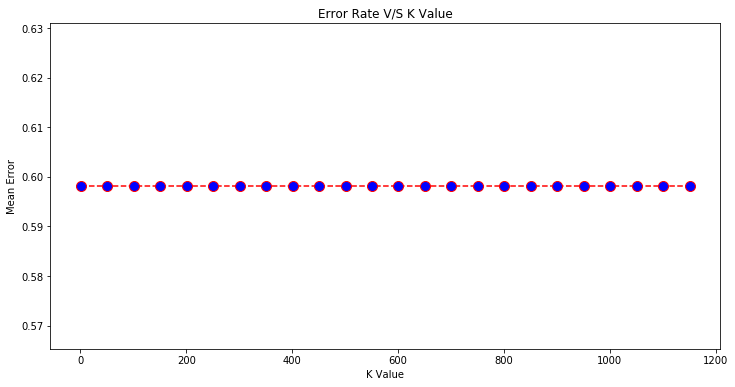

In [542]:
error = []

for i in range(1, 1200, 50):  
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

plt.figure(figsize=(12, 6))  
plt.plot(range(1, 1200, 50), error, color='red', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=10)
plt.title('Error Rate V/S K Value')  
plt.xlabel('K Value')  
plt.ylabel('Mean Error')

In [543]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(100,100),max_iter=10000)
mlp.fit(X_train,y_train)
predictions = mlp.predict(X_test)
print('Classification report for Neural_network')
print(classification_report(y_test,predictions))

Classification report for Neural_network
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        67
           1       0.40      1.00      0.57        45

   micro avg       0.40      0.40      0.40       112
   macro avg       0.20      0.50      0.29       112
weighted avg       0.16      0.40      0.23       112



D:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [544]:
# Import the model we are using
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
clf.fit(X_train, y_train)

predictions = clf.predict(X_test)
print('Classification report for Random forest')
print(classification_report(y_test,predictions))

Classification report for Random forest
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        67
           1       0.40      1.00      0.57        45

   micro avg       0.40      0.40      0.40       112
   macro avg       0.20      0.50      0.29       112
weighted avg       0.16      0.40      0.23       112



D:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


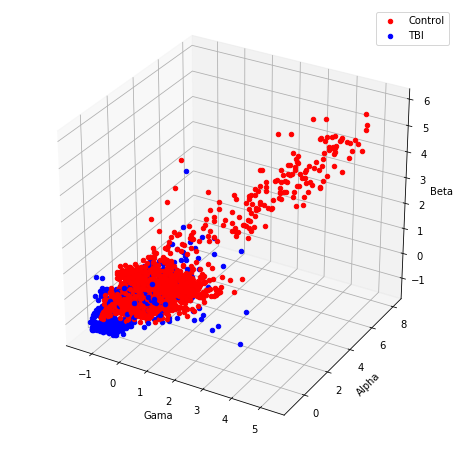

In [340]:
from mpl_toolkits.mplot3d import Axes3D
c=0
fig2 = plt.figure(figsize=(8,8))
ax = fig2.add_subplot(111, projection='3d')
for x in range(len(combine_df)):
    if combine_df.iloc[x,5]==0:
        l1=ax.scatter(combine_df.iloc[x,1],combine_df.iloc[x,2],combine_df.iloc[x,3], color='r',label='Control')
    else :
        l2=ax.scatter(combine_df.iloc[x,1],combine_df.iloc[x,2],combine_df.iloc[x,3],color='b',label='TBI')
plt.xlabel('Gama')
plt.ylabel('Alpha')
ax.set_zlabel('Beta')
plt.legend((l1,l2),('Control','TBI'),loc='upper right')
plt.show()

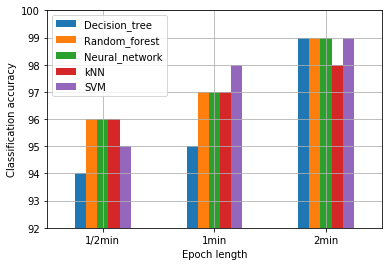

In [47]:
Decision_tree = [94,95,99]
kNN= [96,97,98]
Neural_network= [96,97,99]
Random_forest= [96,97,99]
SVM = [95,98,99]
index = ['1/2min', '1min', '2min']
df3 = pd.DataFrame({'Decision_tree': Decision_tree,'Random_forest': Random_forest,'Neural_network': Neural_network,'kNN': kNN,'SVM':SVM}, index=index)
ax = df3.plot.bar(rot=0)
ax.set_ylim([92,100])
plt.xlabel('Epoch length')
plt.ylabel('Classification accuracy')
ax.grid(zorder=0)

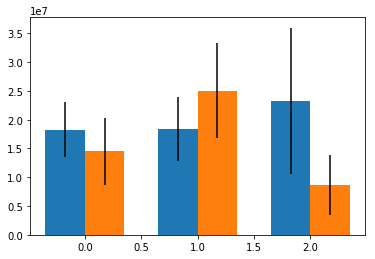

In [144]:
sham_means, sham_std = (np.mean(sham_mean_theta1), np.mean(sham_mean_theta2), np.mean(sham_mean_theta3)), (np.std(sham_mean_theta1), np.std(sham_mean_theta2), np.std(sham_mean_theta3))
tbi_means, tbi_std = (np.mean(tbi_mean_theta1), np.mean(tbi_mean_theta2), np.mean(tbi_mean_theta3)), (np.std(tbi_mean_theta1), np.std(tbi_mean_theta2), np.std(tbi_mean_theta3))

ind = np.arange(len(sham_means))  # the x locations for the groups
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind - width/2, sham_means, width, yerr=sham_std,
                label='Men')
rects2 = ax.bar(ind + width/2, tbi_means, width, yerr=tbi_std,
                label='Women')

In [148]:
import scipy.stats as stats
stats.f_oneway(sham_mean_theta1, sham_mean_theta2, sham_mean_theta3)

F_onewayResult(statistic=83.05689635747176, pvalue=1.499938805758968e-35)

In [2655]:
np.savetxt('extract1.txt', sham_extract1, fmt="%f")

In [2659]:
file = open('extract1.txt', 'r') 
print(file.read())

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

